1. PCA 방식과 4가지 steps을 적으시오. (참고 382p)



- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식
- 4 stpes
1) 입력 데이터 세트의 공분산 행렬 계산
2) 공분산 행렬의 고유벡터와 고유값 계산
3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출
4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력데이터 변환

2. LDA와 PCA의 차이


- PCA : 입력데이터의 변동성이 가장 큰 축을 찾음 (공분산이 가장 큰 것)
- LDa : Classification에서 사용하기 쉽도록, 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾기, 최대한의 축을 찾기 위해 클래스간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원 축소

3.  LDA 4가지 steps 적으시오



- 1) 클래스 내부와 클래스 간 분산 행렬 구함. 개별 피처의 평균 벡터를 기반으로 구한다.
- 2) 클래스 내부 분산 행렬과 클래스 간 분산 행렬을 이용하여 고유백터로 분해
- 3) 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
- 4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

 4. SVD(Singular Value Decompostion)이 PCA와 다른점

정방향 행렬(Square matrix)가 아닌 mxn 크기의 행렬을 분해

5. k-평균 동작 원리와 장단점




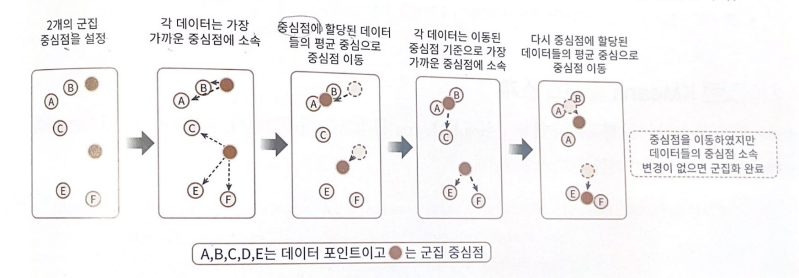

- 장점
  - 쉽고 간결하여 일반적으로 많이 사용
- 단점
 - 거리 기반 알고리즘으로 속성 개수가 매우 많으면 군집화 정확도가 떨어짐
 - 반복 수행하기에 Time cost가 높을 수 있음
 - 몇개의 군집(cluster)을 선택할지 가이드하기 어려움

6.  PCA 연습 
- load_wine data set 이용

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
wine = load_wine()

columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wineDF = pd.DataFrame(wine.data , columns=columns)
wineDF['target']=wine.target
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


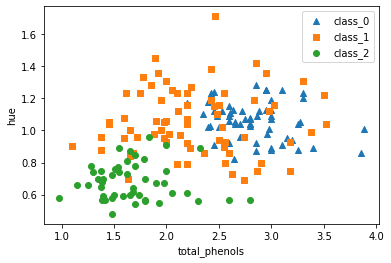

In [2]:
#class1는 세모, class2는 네모, class3는 동그라미로 표현
markers=['^', 's', 'o']

# 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF['target']==i]['total_phenols']
    y_axis_data = wineDF[wineDF['target']==i]['hue']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('total_phenols')
plt.ylabel('hue')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
wine_scaled = StandardScaler().fit_transform(wineDF.iloc[:, :-1])

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


In [4]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns)
wineDF_pca['target']=wine.target
wineDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0


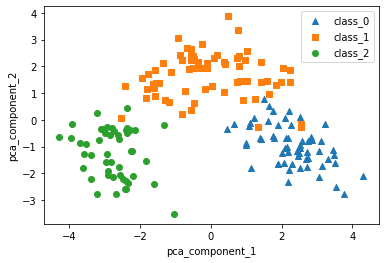

In [5]:
#class1는 세모, class2는 네모, class3는 동그라미로 표현
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_1']
    y_axis_data = wineDF_pca[wineDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

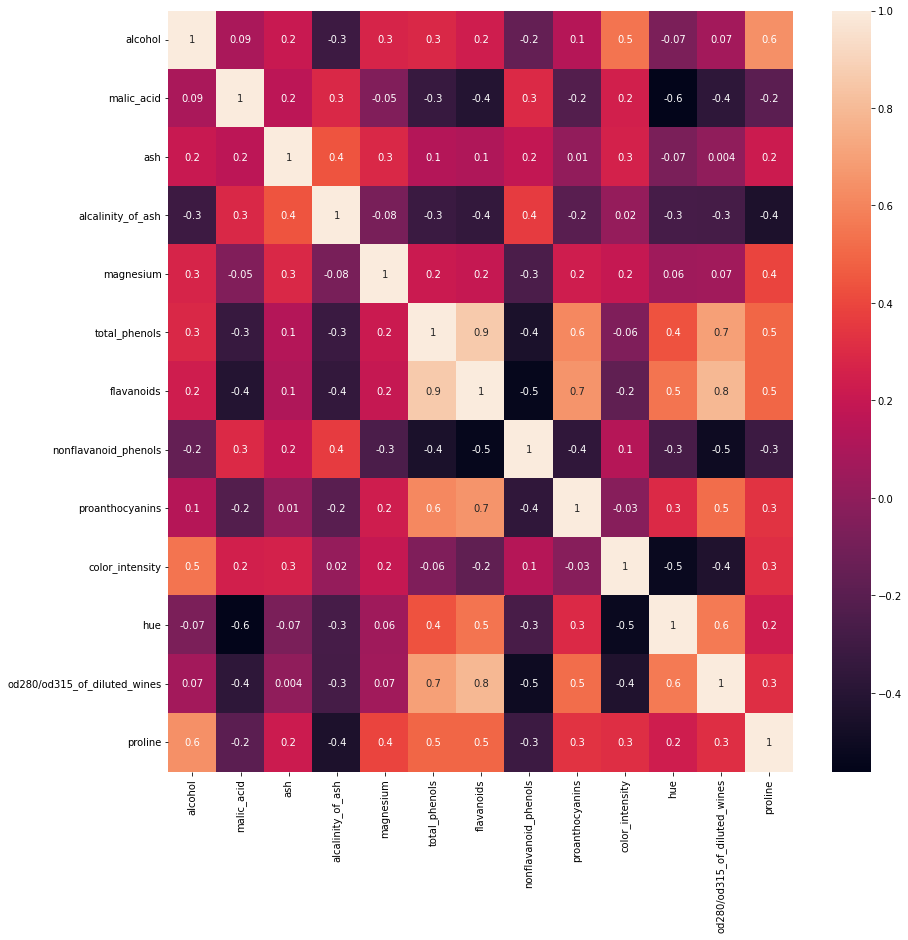

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
X_features = wineDF.drop('target', axis=1)
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, wine.data, wine.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

pca_X = wineDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, wine.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

원본 데이터 교차 검증 개별 정확도: [0.95       0.89830508 1.        ]
원본 데이터 평균 정확도: 0.9494350282485876
PCA 변환 데이터 교차 검증 개별 정확도: [0.93333333 0.91525424 0.96610169]
PCA 변환 데이터 평균 정확도: 0.9382297551789077


7. LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

wine = load_wine()
wine_scaled = StandardScaler().fit_transform(wine.data) # 정규분포로 스케일링

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)
print(wine_lda.shape)

(178, 2)


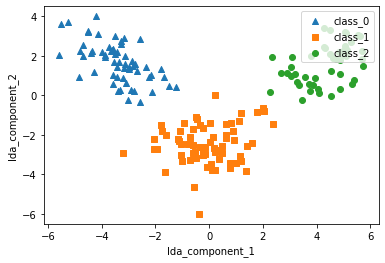

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
wineDF_lda = pd.DataFrame(wine_lda,columns=lda_columns)
wineDF_lda['target']=wine.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_1']
    y_axis_data = wineDF_lda[wineDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=wine.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

8. SVD & NMF

Text(0, 0.5, 'NMF Component 2')

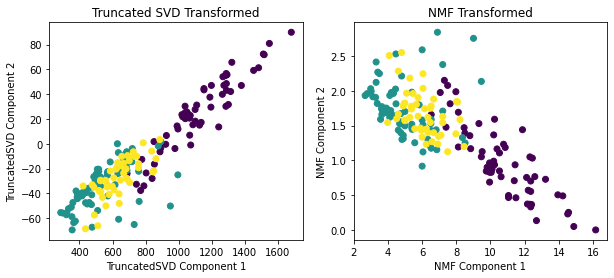

In [10]:
from sklearn.decomposition import TruncatedSVD, PCA, NMF
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline

wine = load_wine()
wine_ftrs = wine.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd = tsvd.transform(wine_ftrs)

# 2개의 주요 component로 NMF 변환
nmf = NMF(n_components=2)
nmf.fit(wine_ftrs)
wine_nmf = nmf.transform(wine_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('NMF Transformed')

ax1.scatter(x=wine_tsvd[:,0], y= wine_tsvd[:,1], c= wine.target)
ax1.set_xlabel('TruncatedSVD Component 1')
ax1.set_ylabel('TruncatedSVD Component 2')

ax2.scatter(x=wine_nmf[:,0], y= wine_nmf[:,1], c= wine.target)
ax2.set_xlabel('NMF Component 1')
ax2.set_ylabel('NMF Component 2')

Text(0, 0.5, 'LDA Component 2')

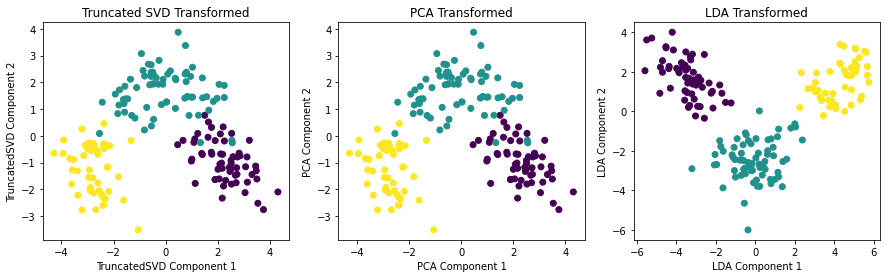

In [12]:
from sklearn.preprocessing import StandardScaler

# wine 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 LDA 변환 수행 
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled, wine.target)
wine_lda = lda.transform(wine_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 가운데에, LDA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,4), ncols=3)
ax1.scatter(x=wine_tsvd[:,0], y= wine_tsvd[:,1], c= wine.target)
ax2.scatter(x=wine_pca[:,0], y= wine_pca[:,1], c= wine.target)
ax3.scatter(x=wine_lda[:,0], y= wine_lda[:,1], c= wine.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
ax3.set_title('LDA Transformed')
ax1.set_xlabel('TruncatedSVD Component 1')
ax1.set_ylabel('TruncatedSVD Component 2')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax3.set_xlabel('LDA Component 1')
ax3.set_ylabel('LDA Component 2')

In [ ]:
from sklearn.preprocessing import StandardScaler

# wine 데이터를 StandardScaler로 변환
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_scaled)
wine_tsvd = tsvd.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)

# 스케일링된 데이터를 기반으로 NMF 변환 수행 
nmf = NMF(n_components=2)
nmf.fit(wine_scaled)
wine_nmf = nmf.transform(wine_scaled)

# TruncatedSVD 변환 데이터 왼쫀, PCA변환 데이터를 가운데, NMF변환 데이터 오른쪽 
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15,4), ncols=2)
ax1.scatter(x=wine_tsvd[:,0], y= wine_tsvd[:,1], c= wine.target)
ax2.scatter(x=wine_pca[:,0], y= wine_pca[:,1], c= wine.target)
ax3.scatter(x=wine_nmf[:,0], y= wine_nmf[:,1], c= wine.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')
ax3.set_title('NMF Transformed')

ax1.set_xlabel('TruncatedSVD Component 1')
ax1.set_ylabel('TruncatedSVD Component 2')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax3.set_xlabel('NMF Component 1')
ax3.set_ylabel('NMF Component 2')

ValueError: ignored

9. 군집화

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(wineDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
wineDF['target'] = wine.target
wineDF['cluster']=kmeans.labels_
wine_result = wineDF.groupby(['target','cluster'])['hue'].count()
print(wine_result)

target  cluster
0       1          46
        2          13
1       0          50
        1           1
        2          20
2       0          19
        2          29
Name: hue, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine.data)

wineDF['pca_x'] = pca_transformed[:,0]
wineDF['pca_y'] = pca_transformed[:,1]
wineDF.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster,pca_x,pca_y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,318.562979,21.492131
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,303.097420,-5.364718
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,438.061133,-6.537309


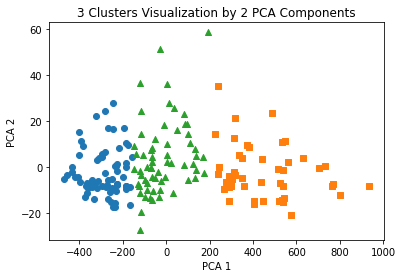

In [ ]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = wineDF[wineDF['cluster']==0].index
marker1_ind = wineDF[wineDF['cluster']==1].index
marker2_ind = wineDF[wineDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=wineDF.loc[marker0_ind,'pca_x'], y=wineDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=wineDF.loc[marker1_ind,'pca_x'], y=wineDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=wineDF.loc[marker2_ind,'pca_x'], y=wineDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()